In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
train_file = './Data/train.csv'
train_enriched_file = './Data/train_enriched.csv'
special_char = '~:;}]{[!@#$%^&*()_+=-><,.|\/?\'\"'
hash_char = '#'
at_char = '@'
#disaster = df_train['target'] == 1

In [3]:
df = pd.read_csv(train_enriched_file, encoding='utf-8')

In [4]:
df.columns

Index(['id', 'keyword', 'text', 'target', 'word_count', 'unique_words_count',
       'Tweet_len', 'special_chars_count', 'hash_count', '@_count',
       'URL_count', 'sentiment', 'subjectivity', 'dis%', 'text_clean',
       'keyword_clean'],
      dtype='object')

In [14]:
disaster = df['target'] == 1
features = ['word_count',
       'unique_words_count', 'Tweet_len', 'special_chars_count',
       'hash_count', '@_count', 'URL_count', 'sentiment',
       'subjectivity'] # 'punctuation_count'

In [6]:
df.head(2)

,id,keyword,text,target,word_count,unique_words_count,Tweet_len,special_chars_count,hash_count,@_count,URL_count,sentiment,subjectivity,dis%,text_clean,keyword_clean
0,1,no_keyword,Our Deeds are the Reason of this #earthquake M...,1,13,13,69,1,1,0,0,0.0,0.0,no_keyword,deed reason #earthquak may allah forgiv,no_keyword
1,4,no_keyword,Forest fire near La Ronge Sask. Canada,1,7,7,38,1,0,0,0,0.1,0.4,no_keyword,forest fire near la rong sask. canada,no_keyword


In [7]:
df_dis = df.loc[disaster]
df_no_dis = df.loc[~disaster]

In [8]:
df_dis.reset_index(inplace=True)
df_no_dis.reset_index(inplace=True)

## plots

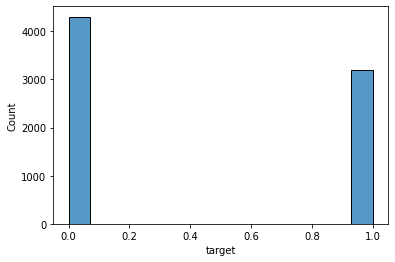

In [9]:
sns.histplot(data=df, x='target');

In [10]:
df['target'].value_counts()/len(df)

0    0.57377
1    0.42623
Name: target, dtype: float64

### <font color = 'red'>disaster</font> vs. <font color='green'>no-distaster</font>

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


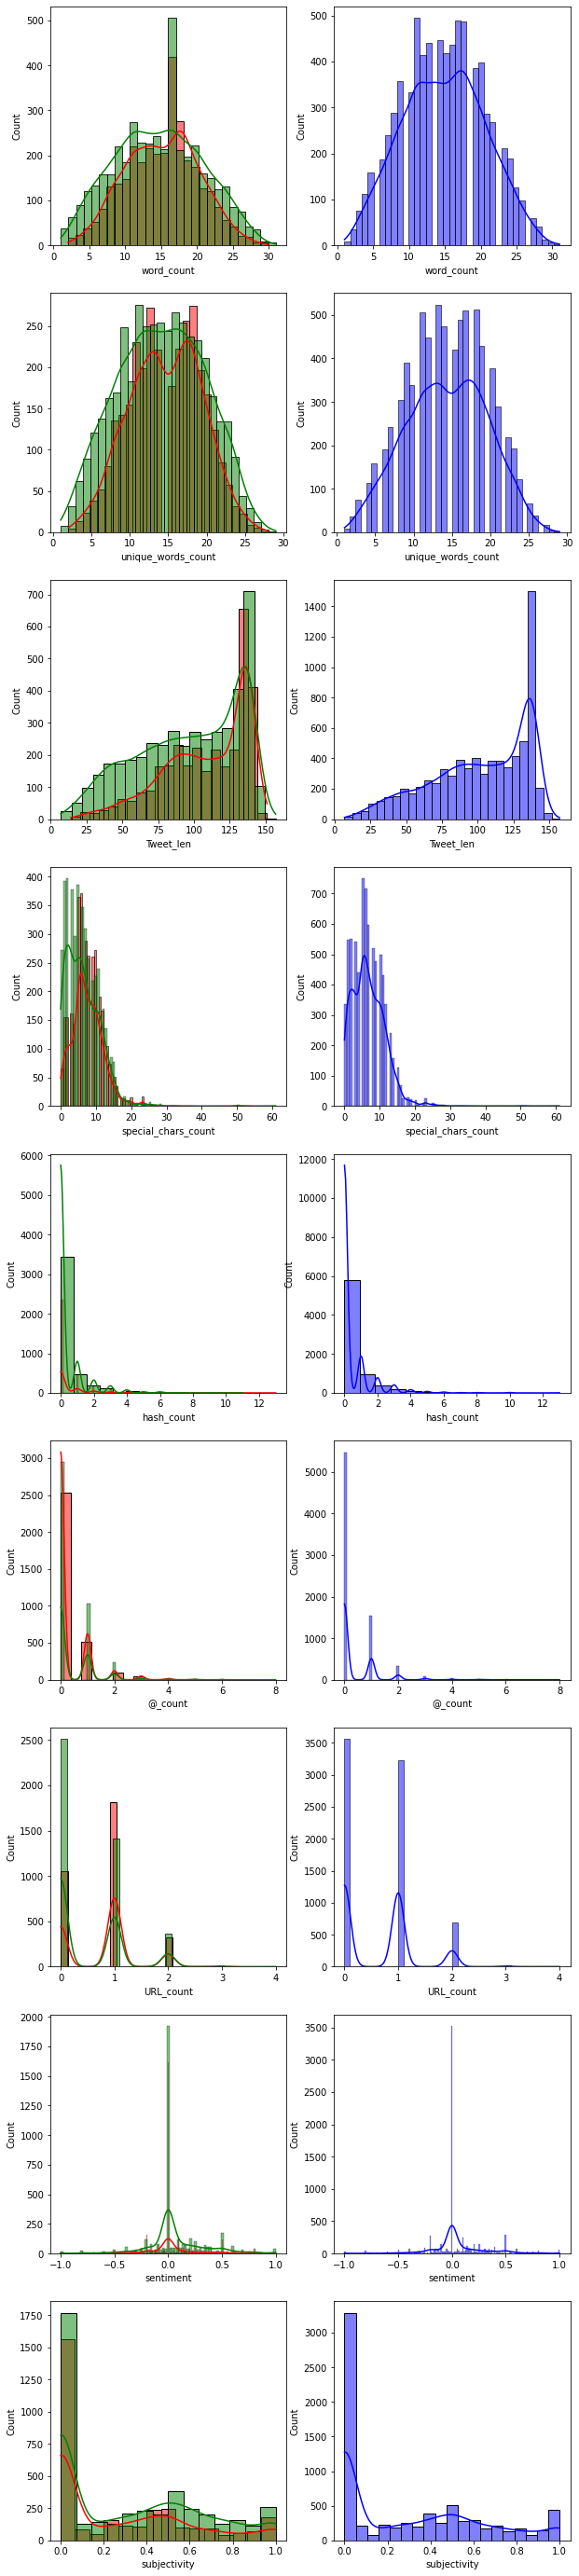

In [18]:
fig, ax = plt.subplots(ncols=2, nrows=len(features) , figsize=(10, 50))

for i,f in enumerate(features):

    
    sns.histplot(df_dis[f], ax=ax[i][0], kde=True, color='red')
    sns.histplot(df_no_dis[f], ax=ax[i][0], kde=True, color='green')
    sns.histplot(df[f], ax=ax[i][1], kde=True, color='blue')
    #sns.histplot(df_no_dis[f], ax=ax[i][2], kde=True, color='green')
fig.show();

    
    
    